# COVID19 Project

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys
from datetime import datetime as dt, timedelta

df =  pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df.date = pd.to_datetime(df.date)
df['cases_diff'] = df.groupby(['county', 'state'])['cases'].diff()
df['deaths_diff'] = df.groupby(['county', 'state'])['deaths'].diff()
df['pct_change'] = df.groupby(['county', 'state'])['cases'].pct_change()

df.set_index(df.date, inplace=True, drop=True)
df.drop(columns=['date'], inplace=True)
df.index = df.index.astype('datetime64[ns]')
df.sort_index(ascending=False, inplace=True)

In [2]:
states = df.state.unique().tolist()
counties = df.county.unique().tolist()
fips = df.fips.unique().tolist()
yesterdays_cases = df.xs(df.index[0])['cases_diff'].sum()
yesterdays_deaths = df.xs(df.index[0])['deaths_diff'].sum()
total_cases = df.xs(df.index[0])['cases'].sum()
total_deaths = df.xs(df.index[0])['deaths'].sum()

def greatest_cases_yesterday():
    gcy = df.sort_values(by=['date', 'cases_diff'], ascending=False)
    return gcy.xs(df.index[0])

def greatest_deaths_yesterday():
    gdy = df.sort_values(by=['date', 'deaths_diff'], ascending=False)
    return gdy.xs(df.index[0])

def county_df(county, state=None):
    county_df = df[df['county'] == county].drop(columns=['county'])
    
    if state is not None:
        county_df = df[(df.county == county) & (df.state == state)]
        return county_df
    
    if county in states:
        return "{0} is not a county but a state.".format(county)
    
    also_in = county_df.state.unique()
    num_counties = len(also_in)
    
    if num_counties == 1:
        county_df.drop(columns=['state', 'fips'], axis=1, inplace=True)
        
    if num_counties > 1:
        return "{0} appears in {1}; please specify.".format(county, also_in)
    
    return county_df

def state_df(state):
    if state not in states:
        return "State is not in database."
    sdf = df[df.state == state].copy()
    counties = sdf.county.unique()
    sdf.sort_index(ascending=False, inplace=True)
    sdf.drop(columns=['fips'], inplace=True)
    return sdf

def yesterday():
    return "{0} cases and {1} deaths on {2}".format(yesterdays_cases, 
                                                    yesterdays_deaths, 
                                                    df.index[0].strftime('%D'))

In [3]:
yesterday()

'184179.0 cases and 2607.0 deaths on 12/01/20'

In [4]:
for i in df.index.unique():
    date = i.date()
    cases = df.xs(i)['cases_diff'].sum()
    deaths = df.xs(i)['deaths_diff'].sum()
    print("{0}, {1}, {2}".format(date, cases, deaths))

2020-12-01, 184179.0, 2607.0
2020-11-30, 167760.0, 1265.0
2020-11-29, 136312.0, 818.0
2020-11-28, 151247.0, 1192.0
2020-11-27, 205462.0, 1412.0
2020-11-26, 103103.0, 1179.0
2020-11-25, 180536.0, 2313.0
2020-11-24, 178290.0, 2209.0
2020-11-23, 179101.0, 1038.0
2020-11-22, 141034.0, 843.0
2020-11-21, 172003.0, 1429.0
2020-11-20, 198672.0, 1952.0
2020-11-19, 187470.0, 1962.0
2020-11-18, 172283.0, 1925.0
2020-11-17, 161729.0, 1607.0
2020-11-16, 166540.0, 796.0
2020-11-15, 135186.0, 623.0
2020-11-14, 159084.0, 1210.0
2020-11-13, 181629.0, 1389.0
2020-11-12, 163491.0, 1172.0
2020-11-11, 143021.0, 1431.0
2020-11-10, 139674.0, 1465.0
2020-11-09, 130436.0, 745.0
2020-11-08, 103326.0, 464.0
2020-11-07, 125800.0, 1007.0
2020-11-06, 138804.0, 1524.0
2020-11-05, 121673.0, 1108.0
2020-11-04, 107724.0, 1599.0
2020-11-03, 92397.0, 1147.0
2020-11-02, 93973.0, 540.0
2020-11-01, 74224.0, 427.0
2020-10-31, 84235.0, 824.0
2020-10-30, 99814.0, 960.0
2020-10-29, 90794.0, 1015.0
2020-10-28, 81835.0, 1012.0
20

In [5]:
for state in states:
    cases = state_df(state).xs(df.index[0])['cases_diff'].sum()
    deaths = state_df(state).xs(df.index[0])['deaths_diff'].sum()
    print("{0}, {1}, {2}".format(state, cases, deaths))

Wyoming, 1012.0, 0.0
Kentucky, 4603.0, 26.0
Louisiana, 4964.0, 41.0
Maine, 0.0, 0.0
Maryland, 2570.0, 22.0
Iowa, 1742.0, 11.0
Kansas, 4723.0, 26.0
Mississippi, 1005.0, 6.0
Missouri, 3409.0, 11.0
Montana, 114.0, 0.0
Michigan, 16680.0, 183.0
Massachusetts, 4658.0, 31.0
Minnesota, 5698.0, 101.0
Colorado, 4889.0, 21.0
California, 16934.0, 75.0
Florida, 17344.0, 109.0
Georgia, 2738.0, 41.0
District of Columbia, 201.0, 0.0
Delaware, 591.0, 2.0
Connecticut, 3429.0, 35.0
Alabama, 917.0, 0.0
Alaska, 672.0, 0.0
Arizona, 4371.0, 20.0
Arkansas, 1052.0, 0.0
Illinois, 7759.0, 96.0
Indiana, 5639.0, 33.0
Idaho, 2141.0, 13.0
Hawaii, 118.0, 3.0
Guam, 20.0, 1.0
Texas, 4753.0, 53.0
South Carolina, 2215.0, 29.0
South Dakota, 2138.0, 39.0
Tennessee, 4135.0, 7.0
West Virginia, 866.0, 0.0
Washington, 3319.0, 3.0
Virginia, 1544.0, 15.0
Wisconsin, 1453.0, 13.0
Vermont, 178.0, 3.0
Utah, 5662.0, 15.0
Virgin Islands, 0.0, 0.0
New York, 8179.0, 45.0
North Carolina, 7516.0, 63.0
New Mexico, 2056.0, 35.0
North Dakota

In [6]:
state_df("New Jersey").xs(df.index[0]).sort_values(by=['cases_diff'], ascending=False)

,county,state,cases,deaths,cases_diff,deaths_diff,pct_change
date,,,,,,,
2020-11-23,Bergen,New Jersey,32491,2102,394.0,1.0,0.012275
2020-11-23,Passaic,New Jersey,27582,1300,373.0,1.0,0.013709
2020-11-23,Essex,New Jersey,33318,2202,310.0,0.0,0.009392
2020-11-23,Union,New Jersey,26518,1422,304.0,2.0,0.011597
2020-11-23,Middlesex,New Jersey,28466,1476,276.0,0.0,0.009791
2020-11-23,Hudson,New Jersey,29537,1559,263.0,2.0,0.008984
2020-11-23,Camden,New Jersey,17167,664,249.0,0.0,0.014718
2020-11-23,Ocean,New Jersey,20392,1099,238.0,1.0,0.011809
2020-11-23,Monmouth,New Jersey,18926,890,210.0,2.0,0.011220


<AxesSubplot:xlabel='date'>

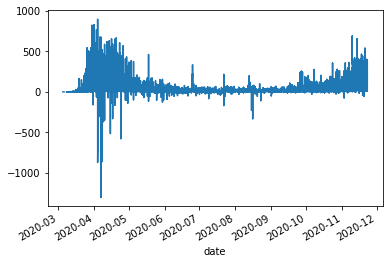

In [7]:
state_df("New Jersey")['cases_diff'].plot()

<AxesSubplot:xlabel='date'>

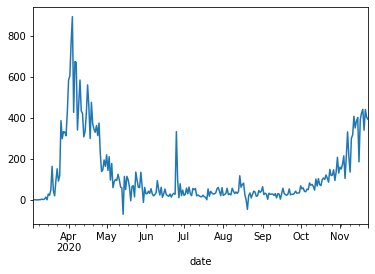

In [8]:
county_df("Bergen")['cases_diff'].plot()

In [9]:
state_df("New Jersey").sort_values(by=['cases_diff'], ascending=False)['cases_diff'].sum()

311368.0

<AxesSubplot:xlabel='date'>

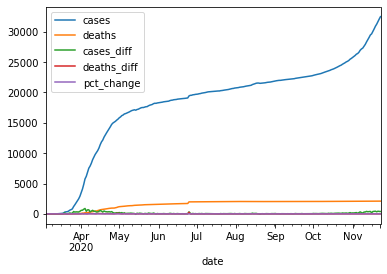

In [10]:
county_df("Bergen").sort_index(ascending=True).plot()

<AxesSubplot:xlabel='date'>

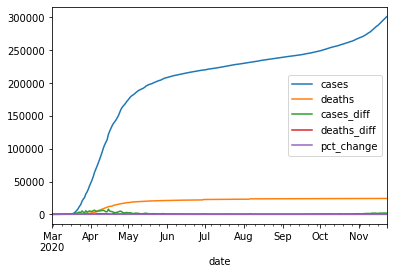

In [11]:
county_df("New York City").sort_index(ascending=True).plot()

<AxesSubplot:xlabel='date'>

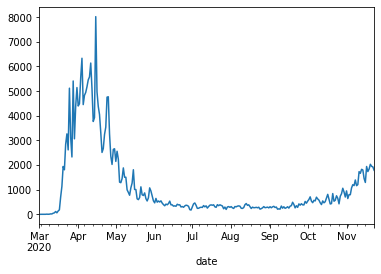

In [12]:
county_df("New York City").cases_diff.plot()

<AxesSubplot:xlabel='date'>

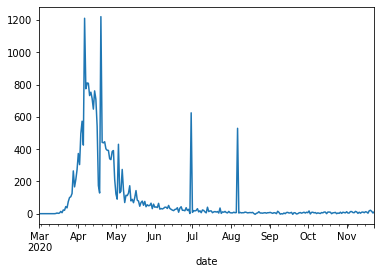

In [13]:
county_df("New York City").deaths_diff.plot()

In [14]:
df.index.date[0].strftime("%a"), df.index.date[0].strftime("%d"), df.index.date[0].strftime("%b")

('Mon', '23', 'Nov')

#### list comprehension into separate dataframe?

In [29]:
for month in df.index.strftime("%B").unique():
    print(month)

November
October
September
August
July
June
May
April
March
February
January


In [9]:
for month in df.index.month.unique():
    print(month, df[df.index.month == month]['cases_diff'].sum())

11 4411981.0
10 1946627.0
9 1217119.0
8 1473763.0
7 1917749.0
6 852437.0
5 721813.0
4 886531.0
3 185327.0
2 34.0
1 1.0


In [16]:
for week in df.index.isocalendar().week.unique():
    print(week, df[df.index.isocalendar().week == week]['cases_diff'].sum())

48 178947.0
47 1199699.0
46 1052408.0
45 783658.0
44 580286.0
43 489168.0
42 398396.0
41 370188.0
40 305972.0
39 313471.0
38 287735.0
37 245475.0
36 283766.0
35 295135.0
34 296183.0
33 361201.0
32 377139.0
31 434918.0
30 458787.0
29 465424.0
28 407471.0
27 346667.0
26 271399.0
25 187867.0
24 151167.0
23 154104.0
22 147870.0
21 157697.0
20 157061.0
19 169385.0
18 194502.0
17 213367.0
16 199454.0
15 219768.0
14 194865.0
13 108172.0
12 28537.0
11 2630.0
10 351.0
9 41.0
8 3.0
7 1.0
6 0.0
5 2.0
4 0.0


In [17]:
df[df.index.isocalendar().week == df.index.isocalendar().week[-1]]

,county,state,fips,cases,deaths,cases_diff,deaths_diff,pct_change
date,,,,,,,,
2020-01-26,Snohomish,Washington,53061.0,1,0,0.0,0.0,0.0
2020-01-26,Cook,Illinois,17031.0,1,0,0.0,0.0,0.0
2020-01-26,Orange,California,6059.0,1,0,0.0,0.0,0.0
2020-01-26,Los Angeles,California,6037.0,1,0,NaN,NaN,NaN
2020-01-26,Maricopa,Arizona,4013.0,1,0,NaN,NaN,NaN
2020-01-25,Snohomish,Washington,53061.0,1,0,0.0,0.0,0.0
2020-01-25,Cook,Illinois,17031.0,1,0,0.0,0.0,0.0
2020-01-25,Orange,California,6059.0,1,0,NaN,NaN,NaN
2020-01-24,Snohomish,Washington,53061.0,1,0,0.0,0.0,0.0


#### Alternate method for finding total cases:

In [18]:
df[df.index.dayofyear == df.index.dayofyear.max()]['cases'].sum()

12492056

##### last day of the first week

In [19]:
df[df.index.isocalendar().week == df.index.isocalendar().week[-1]].index.max().date()

datetime.date(2020, 1, 26)

In [20]:
state_df('New Jersey')

,county,state,cases,deaths,cases_diff,deaths_diff,pct_change
date,,,,,,,
2020-11-23,Hudson,New Jersey,29537,1559,263.0,2.0,0.008984
2020-11-23,Gloucester,New Jersey,8190,267,117.0,1.0,0.014493
2020-11-23,Essex,New Jersey,33318,2202,310.0,0.0,0.009392
2020-11-23,Cumberland,New Jersey,4780,170,39.0,0.0,0.008226
2020-11-23,Cape May,New Jersey,1559,106,25.0,0.0,0.016297
...,...,...,...,...,...,...,...
2020-03-07,Camden,New Jersey,1,0,0.0,0.0,0.000000
2020-03-06,Bergen,New Jersey,3,0,1.0,0.0,0.500000
2020-03-06,Camden,New Jersey,1,0,NaN,NaN,NaN


<AxesSubplot:xlabel='date'>

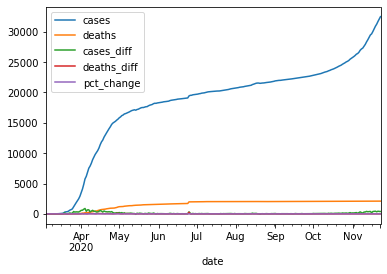

In [21]:
county_df("Bergen").plot()

<AxesSubplot:xlabel='date'>

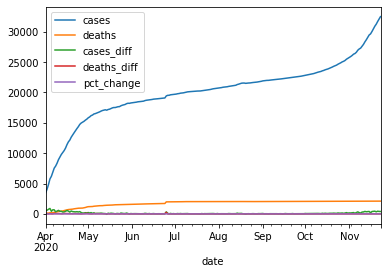

In [22]:
df[(df.index.month >= 4) & (df.state == 'New Jersey') & (df.county == 'Bergen')].drop(columns=['fips']).plot()

In [23]:
county_df("Bergen")

,cases,deaths,cases_diff,deaths_diff,pct_change
date,,,,,
2020-11-23,32491,2102,394.0,1.0,0.012275
2020-11-22,32097,2101,404.0,0.0,0.012747
2020-11-21,31693,2101,441.0,3.0,0.014111
2020-11-20,31252,2098,340.0,2.0,0.010999
2020-11-19,30912,2096,442.0,5.0,0.014506
...,...,...,...,...,...
2020-03-08,4,0,1.0,0.0,0.333333
2020-03-07,3,0,0.0,0.0,0.000000
2020-03-06,3,0,1.0,0.0,0.500000


In [32]:
state_df("New Jersey").index[0]

Timestamp('2020-11-22 00:00:00')

In [24]:
county_df("New York City")['cases_diff'].idxmax().date(), county_df("New York City")['cases_diff'].max()

(datetime.date(2020, 4, 15), 8021.0)

In [25]:
county_df("Bergen").sort_values(by=['cases_diff'], ascending=False)

,cases,deaths,cases_diff,deaths_diff,pct_change
date,,,,,
2020-04-04,5760,179,894.0,47.0,0.183724
2020-04-03,4866,132,767.0,12.0,0.187119
2020-04-06,6862,200,675.0,11.0,0.109100
2020-04-07,7533,263,671.0,63.0,0.097785
2020-04-02,4099,120,605.0,45.0,0.173154
...,...,...,...,...,...
2020-05-20,17518,1500,-4.0,26.0,-0.000228
2020-05-30,18211,1573,-12.0,6.0,-0.000659
2020-08-20,21505,2034,-46.0,1.0,-0.002134
